<a href="https://colab.research.google.com/github/hugo12xx/memoria/blob/main/maze_runner_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q-Learning by Neural Network - Maze Runner

This is an example code of q-learning using neural network. The agent needs to run through a 5 x 5 maze via the shortest route, avoiding obstacles and arriving at the goal. It will be punished for a wrong action selected (steping on the obstacles) and rewarded for a correct action (arriving at the goal).

Tensorflow is used for this example.

## Initialization (Import packages and class)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
victoria_total=[]

# Properties of the agent, environment (the maze) and the reward signal (reward map)
class RLAgent(object):
    def __init__(self, ini_state):
        self.state_map = np.arange(100).reshape((10,10))
        self.current_state = ini_state
        self.current_y, self.current_x = self.__findIndex()
        self.reward_map = self.__createRewardMap()

    # if a step (action) is taken by the agent, current state will be incremented, also, its location in the state_map will change
    def step(self, action):
        self.previous_state = self.current_state
        if action == "u" or action == 0:
            self.current_y -= 1
        elif action == "d" or action == 1:
            self.current_y += 1
        elif action == "l" or action == 2:
            self.current_x -= 1
        elif action == "r" or action == 3:
            self.current_x += 1
        elif action == "s":
            print("goal arrived")
        self.current_state = self.state_map[self.current_y, self.current_x]
    def __findIndex(self):
        indexes = np.where(self.state_map == self.current_state)
        return int(indexes[0]), int(indexes[1])
    
    # Return the current location of the agent as x,y cooridinate in the state_map
    def getCoor(self):
        return (self.current_y, self.current_x)
    
    # The agent cannot step outside of the map boundary, therefore, at the boundary the choices of next action are controlled
    def getNextDirection(self):
        if self.current_state in [1,2,3,4,5,6,7,8]:
            return ("d", "l", "r")
        elif self.current_state in [10,20,30,40,50,60,70,80]:
            return ("u", "d", "r")
        elif self.current_state in [19,29,39,49,59,69,79,89]:
            return ("u", "d", "l")
        elif self.current_state in [91,92,93,94,95,96,97,98]:
            return ("u", "l", "r")
        

      

        elif self.current_state == 24:
            return ("l", "u")

        elif self.current_state == 0:
            return ("r", "d")
        elif self.current_state == 9:
            return ("l", "d")
        
            return ("l", "d")
        elif self.current_state == 90:
            return ("u", "r")
        elif self.current_state == 99:
            return ("l", "u")
        else:
            return ("u", "d", "l", "r")

    @staticmethod
    def __createRewardMap():
        reward_points = [(3,1),(9,3),(0,7),(0,3),(1,3),(2,0),(2,2)]
        reward_map = np.zeros((10,10))
        for point in reward_points:
            if point != (0,7) :
                reward_map[point] = 200
            else :
                reward_map[point] = 500
            if point == (0,3):
                reward_map[point]= -100
            elif point==(1,3):
                reward_map[point]=-100
            elif point==(2,0):
                reward_map[point]=-100
            elif point==(2,2):
                reward_map[point]=-100
          
        return reward_map



## State Map and Reward Map  
The current state of the agent represents its current location in the _5_ _x_ _5_ maze. The states are indexed by numbers from 0 to 24, corresponding to 25 positions in the maze (as shown in the "state map" below). The states are also indexed by numpy array indexes, for example, state 13 = state_map [ 2 , 3 ].

During calculation, we use a 25 x 25 state matrix to contain the 25 one-hot column vectors, each representing the $n_{th}$  state with value of 1 at the $n_{th}$ row.

In the reward map, the value represents the reward obtained by the agent after it selects an action and steps on there. The negative reward (punishment) represents the **_wall_** that the agent should not pass through, while the positive reward represents the **_goal_** that the agent needs to arrive.


In [ ]:
test_agent = RLAgent(0)
print("State Map")
print(np.arange(100).reshape(10,10))
print("Reward Map")
print(test_agent.reward_map)

State Map
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
Reward Map
[[   0.    0.    0. -100.    0.    0.    0.  500.    0.    0.]
 [   0.    0.    0. -100.    0.    0.    0.    0.    0.    0.]
 [-100.    0. -100.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  200.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.  200.    0.    0.    0.    0.    0.    0.]]


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


## Training

Procedures are as follows:

1. Hyper-parameters initialization
2. Creating computational graph by Tensorflow
3. Training

For ease of observation, actions are represented as strings ( "u" = up, "d" = down... and so on ), and they are converted to indexes (0, 1, 2, 3 ) during computation.

Five hyperparameters are tuned. Learning rate, number of episode, number of iteration, $\gamma$ (gamma), probability of randomly sampling an action (e).


In [ ]:
#ENTRENAMIENTO PRIMERA SUB TAREA


# Each key represents a direction the agent is going. 
# "u" = moving up, "d" = down, "l" = left, "r" = right
# The output Q (4 x 1 Matrix) is defined as Q value for each action (totally 4 actions)
# Two dictionaries are used to map between indexes of Q and the action keys
key_to_index = {"u": 0, "d": 1, "l":2, "r":3}
index_to_key = {0:"u", 1:"d", 2:"l", 3:"r"}

# One-hot vector for each state. Each state represents one unique position in the grid
state_matrix = np.zeros((100,100))
for i in range(100):
    state_matrix[i, i] = 1

# Hyperarameters (fine tuned for this project)
learning_rate = 0.00001
num_episode = 10000
num_iter = 10
gamma = 0.9
e = 0.7
e_initial = e

# Network Parameters
n_hidden_1 = 256 
num_states = 100 
num_actions = 4

def createParameters():
    weights = {
        'h1': tf.Variable(tf.random_normal([n_hidden_1, num_states])),
        'out': tf.Variable(tf.random_normal([num_actions, n_hidden_1]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1,1])),
        'out': tf.Variable(tf.random_normal([num_actions,1]))
    }
    return weights, biases

def forwardProp(x, weights, biases):
    
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(weights['h1'], x), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(weights['out'], layer_1) + biases['out']
    return out_layer

# Construct model & Output
weights, biases = createParameters()
X_input = tf.placeholder(shape=[num_states, 1], dtype=tf.float32)
Q_next_state = tf.placeholder(shape=[num_actions, 1],dtype=tf.float32)
Qout = forwardProp(X_input, weights, biases)

# Find the index of the action which has the highest score in output matrix Q
first_action = tf.argmax(Qout,0)

# Define loss and optimizer
loss = (1/num_actions)*tf.reduce_sum(tf.square(Q_next_state - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
updateWeights = trainer.minimize(loss)

# Initialize the variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Record Cost
cost_list_iter = []
cost_list_episode = []

# ----------------- Start Training -----------------

# There are num_episode of games. Each time the agent state is reset to 0 (starting point)
tt1 = np.array([[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0] ])
ts1 = np.array([[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0] ])
valores_q1 = np.array([[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0] ])
proba11 = np.array([[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0] ])

q_list=[]
ea=[]

for j in range(num_episode):
    agent = RLAgent(0)
    t_list=[]
    # Each game episode is iterated for num_iter times
    i=0
    vic=0
    for i in range(num_iter):

        
        posi=  agent.current_state
        
        if posi==3:
          break
        if posi==13:
          break  
        if posi==20:
          break
        if posi==22:
          break 
        if vic==1:
          break
        


        # Feedforward to the network, and output the action choices (the scores of all actions) and the first choice
        first_Q_idx, Q1 = sess.run([first_action, Qout],feed_dict={X_input:state_matrix[:,agent.current_state].reshape((100,1))})
        
        # Define the best action at the current state
        first_Q_idx = first_Q_idx[0]
        first_Q_key = index_to_key[first_Q_idx]
        
        # agent.getNextDirection() returns the allowed direction of step at the current state, such that it will not step outside of the 5 x 5 matrix map
        next_direction = agent.getNextDirection()
        
        # There is e chance that the agent will step in a random direction
        # The condition on the right is to ensure the best action "first_Q_key" is in the allowed choices
        if np.random.rand(1) < e or (first_Q_key not in next_direction):
            
            # Select randomly from the set of allowed directions
            rand_index = np.random.randint(0, len(next_direction))
            Q_index = key_to_index[next_direction[rand_index]]
        else:
            
            # Select the best action (with highest Q value)
            Q_index = first_Q_idx

        # Agent goes to the next state based on the selected action above

       
        if agent.current_state==31:
          vic=1

        if agent.current_state !=31:

           
          
          

        
          ea = (agent.current_state,Q_index)
          t_list.append(ea)

          
          agent.step(Q_index)
        


          tt1[ea]=tt1[ea]+1 
          # Get the reward at the current state. Reward < 0 when the path is undesirable, and vice versa
          coordinates = agent.getCoor()
          reward = agent.reward_map[coordinates[0], coordinates[1]]
          
          # Calculate the ouput Q-matrix for the next state
          Q2 = sess.run(Qout,feed_dict={X_input:state_matrix[:,agent.current_state].reshape((100,1))})
          
          # Subsitute the current Q value of the selected action with the best Q value of the next state, with discount of gamma <= 1
          
          Q_target = Q1
          Q_target[Q_index,0] = reward + gamma * np.max(Q2)
          if agent.current_state!=31:
            a=int(Q2[0,0])
            b=int(Q2[1,0])
            c=int(Q2[2,0])
            d=int(Q2[3,0])
            print (q_list)
            q_list=[a,b,c,d]
              
                
            valores_q1[agent.current_state]=q_list
          
          
          # Update the weights by back propagation. 
          # Since the state has been incremented, we backpropagate the "previous_state" remembered by the agent object instead
          _,loss_val = sess.run([updateWeights,loss],feed_dict={X_input:state_matrix[:,agent.previous_state].reshape((100,1)),Q_next_state:Q_target})
          cost_list_iter.append(loss_val)
        
        # Print the progress if you want
       # print("\r Iter/Episode = %d/%d" % (i, j), end = "")
        # print("Iter/Episode = %d/%d | state = %d | Loss = %f" % (i, j, agent.current_state, loss_val))
    



    largo=len(t_list)
    a=[]
    n=0
    if vic==1:
         # print ("ganaste")
          for n in range(largo):
            a=t_list[n]
            #print (a)

            ts1[a]=ts1[a]+1
    # Record the cost
    if len(cost_list_iter) != 0:
        cost_list_episode.append(np.mean(cost_list_iter))
        cost_list_iter = []


Se han truncado las últimas 5000 líneas del flujo de salida.
[276, 331, 266, 244]
[199, 127, 286, 100]
[276, 331, 266, 244]
[274, 368, 126, 105]
[231, 298, 241, 213]
[276, 331, 266, 244]
[231, 298, 241, 213]
[276, 331, 266, 244]
[231, 298, 241, 213]
[190, 221, 251, 129]
[231, 298, 241, 213]
[190, 221, 251, 129]
[199, 127, 286, 100]
[200, 191, 195, 177]
[231, 298, 242, 213]
[234, 268, 189, 267]
[244, 95, 190, 297]
[198, 198, 217, 185]
[244, 95, 190, 297]
[198, 198, 217, 185]
[244, 95, 190, 297]
[234, 268, 189, 267]
[231, 298, 242, 213]
[276, 331, 266, 245]
[244, 95, 190, 297]
[198, 198, 217, 185]
[231, 298, 242, 213]
[276, 331, 266, 245]
[231, 298, 242, 213]
[190, 221, 251, 129]
[231, 298, 242, 213]
[234, 268, 189, 267]
[231, 298, 242, 213]
[234, 268, 189, 267]
[244, 95, 190, 297]
[276, 331, 266, 245]
[244, 95, 190, 297]
[276, 331, 266, 245]
[274, 368, 126, 105]
[231, 298, 242, 213]
[276, 331, 266, 245]
[274, 368, 126, 105]
[244, 95, 190, 297]
[276, 331, 266, 245]
[199, 127, 286, 101]
[

## Testing the agent

After the training above, the agent will start to navigate through the maze and try to avoid the wall. It will stop when it arrive the goal. 



In [ ]:
print("\nTesting phase starts")

# Reset the agent to the state of 0 (top-left corner)
agent = RLAgent(0)

# Record the action sequence
action_sequence = []

for i in range(50):
    print("Current state =", agent.current_state)
    victoria_total.append(agent.current_state)

    # Forward propagate and get the output Q values
    Q_values = sess.run(Qout,feed_dict={X_input:state_matrix[:,agent.current_state].reshape((100,1))})
    if agent.current_state == 31:
        print("Goal arrived! Game ends.")
        break
        
    # Sort the values of Q, such that it contains the indexes of actions by a descending order of scores
    Q_sorted = np.flip(np.argsort(Q_values.squeeze()),axis = 0)
    
    # Get the allowed directions in the current state
    next_direction = agent.getNextDirection()
    
    # initalise the varible that will store the best action we take
    action_key = 99
    
    # We check each action in Q_sorted and see if it is in one of the allowed directions.
    # The action with higher Q-value will be checked first, once we know it is in the allowed directions, we select that action and exit the loop
    for j in Q_sorted:
        
        # Once an action is selected, exit the loop
        if action_key != 99:
            break
            
        # If the action is in the allowed direction, store it into action_key
        if index_to_key[j] in next_direction:
            action_key = index_to_key[j]
            
        # If not, then check the next action
        else:
            continue
            
    # Showing Q-matrix and how the agent select the action
#     print("Q_val = %s | Q_sorted = %s | Action_selected = %s | Allowed_direction  = %s" % (str(Q_values.squeeze()), str(Q_sorted), action_key, str(next_direction)))

    # Increment the state and record the action
    action_sequence.append(action_key)
    agent.step(action_key)
sess.close()


Testing phase starts
Current state = 0
Current state = 10
Current state = 11
Current state = 21
Current state = 31
Goal arrived! Game ends.


In [ ]:
#t_episode = np.arange(len(cost_list_episode)) + 1
#plt.plot(t_episode, cost_list_episode)
#plt.xlabel("Number of Episode")
#plt.ylabel("Squared Error")
#plt.show()



from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(cost_list_episode, sigma=1)
plt.plot(np.arange(len(cost_list_episode)), ysmoothed)
plt.show()

NameError: ignored

In [ ]:
print (valores_q1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import savefig

#probabilidades1=pd.DataFrame(proba)
#probabilidades2=pd.DataFrame(proba2)

proba11=ts1/tt1

proba1=pd.DataFrame(proba11)
print (proba11)

[[       nan 0.18271443        nan 0.21566423]
 [       nan 0.23302716 0.09848485 0.07596154]
 [       nan 0.08470588 0.10273973 0.        ]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [0.13389121 0.                nan 0.25114454]
 [0.09750088 0.45314243 0.1023732  0.09408259]
 [0.03417266 0.         0.18413978 0.        ]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]
 [0.18561001 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
plt.figure(figsize = (10,10))

#mapa1= sns.heatmap(probatotal,cmap="YlOrRd")
#valores_q1=valores_q1/100
valores_q1[3]=[0,0,0,0]
valores_q1[13]=[0,0,0,0]
valores_q1[20]=[0,0,0,0]
valores_q1[22]=[0,0,0,0]
ax=sns.heatmap(proba11, cmap='YlOrRd')  
plt.show()
figure =mapa1.get_figure()
figure.savefig('mapa1.png',dpi=400)

NameError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
test_agent = RLAgent(31)
print("State Map")
print(np.arange(100).reshape(10,10))
print("Reward Map")
print(test_agent.reward_map)

State Map
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
Reward Map
[[  0.   0.   0.   0.   0.   0.   0. 500.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 200.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 200.   0.   0.   0.   0.   0.   0.]]


In [ ]:
#ENTRENAMIENTO SEGUNDA SUB TAREA
# Each key represents a direction the agent is going. 
# "u" = moving up, "d" = down, "l" = left, "r" = right
# The output Q (4 x 1 Matrix) is defined as Q value for each action (totally 4 actions)
# Two dictionaries are used to map between indexes of Q and the action keys
key_to_index = {"u": 0, "d": 1, "l":2, "r":3}
index_to_key = {0:"u", 1:"d", 2:"l", 3:"r"}

# One-hot vector for each state. Each state represents one unique position in the grid
state_matrix = np.zeros((100,100))
for i in range(100):
    state_matrix[i, i] = 1

# Hyperarameters (fine tuned for this project)
learning_rate = 0.00001
num_episode = 150000
num_iter = 100
gamma = 0.9
e = 0.7
e_initial = e

# Network Parameters
n_hidden_1 = 256 
num_states = 100 
num_actions = 4

def createParameters():
    weights = {
        'h1': tf.Variable(tf.random_normal([n_hidden_1, num_states])),
        'out': tf.Variable(tf.random_normal([num_actions, n_hidden_1]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1,1])),
        'out': tf.Variable(tf.random_normal([num_actions,1]))
    }
    return weights, biases

def forwardProp(x, weights, biases):
    
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(weights['h1'], x), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(weights['out'], layer_1) + biases['out']
    return out_layer

# Construct model & Output
weights, biases = createParameters()
X_input = tf.placeholder(shape=[num_states, 1], dtype=tf.float32)
Q_next_state = tf.placeholder(shape=[num_actions, 1],dtype=tf.float32)
Qout = forwardProp(X_input, weights, biases)

# Find the index of the action which has the highest score in output matrix Q
first_action = tf.argmax(Qout,0)

# Define loss and optimizer
loss = (1/num_actions)*tf.reduce_sum(tf.square(Q_next_state - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
updateWeights = trainer.minimize(loss)

# Initialize the variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Record Cost
cost_list_iter = []
cost_list_episode = []

# ----------------- Start Training -----------------

# There are num_episode of games. Each time the agent state is reset to 0 (starting point)
tt2 = np.array([[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0] ])
ts2 = np.array([[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0] ])
valores_q2 = np.array([[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0] ])
q_list2=[]
ea=[]

for j in range(num_episode):
    agent = RLAgent(31)
    t_list=[]
    # Each game episode is iterated for num_iter times
    i=0
    vic=0
    for i in range(num_iter):

        
        posi=  agent.current_state
        
        if posi==3:
          break
        if posi==13:
          break  
        if posi==20:
          break
        if posi==22:
          break 
        if posi==7:
          break
        if vic==1:
          break
        


        # Feedforward to the network, and output the action choices (the scores of all actions) and the first choice
        first_Q_idx, Q1 = sess.run([first_action, Qout],feed_dict={X_input:state_matrix[:,agent.current_state].reshape((100,1))})
        
        # Define the best action at the current state
        first_Q_idx = first_Q_idx[0]
        first_Q_key = index_to_key[first_Q_idx]
        
        # agent.getNextDirection() returns the allowed direction of step at the current state, such that it will not step outside of the 5 x 5 matrix map
        next_direction = agent.getNextDirection()
        
        # There is e chance that the agent will step in a random direction
        # The condition on the right is to ensure the best action "first_Q_key" is in the allowed choices
        if np.random.rand(1) < e or (first_Q_key not in next_direction):
            
            # Select randomly from the set of allowed directions
            rand_index = np.random.randint(0, len(next_direction))
            Q_index = key_to_index[next_direction[rand_index]]
        else:
            
            # Select the best action (with highest Q value)
            Q_index = first_Q_idx

        # Agent goes to the next state based on the selected action above


        if agent.current_state==93:
          vic=1
        if agent.current_state != 93:

          a=int(Q2[0,0])
          b=int(Q2[1,0])
          c=int(Q2[2,0])
          d=int(Q2[3,0])
          print (q_list)
          q_list2=[a,b,c,d]
            
              
          valores_q2[agent.current_state]=q_list   
        
          ea = (agent.current_state,Q_index)
          t_list.append(ea)


          agent.step(Q_index)
          


          tt2[ea]=tt2[ea]+1 
          # Get the reward at the current state. Reward < 0 when the path is undesirable, and vice versa
          coordinates = agent.getCoor()
          reward = agent.reward_map[coordinates[0], coordinates[1]]
          
          # Calculate the ouput Q-matrix for the next state
          Q2 = sess.run(Qout,feed_dict={X_input:state_matrix[:,agent.current_state].reshape((100,1))})
          
          # Subsitute the current Q value of the selected action with the best Q value of the next state, with discount of gamma <= 1
          Q_target = Q1
          Q_target[Q_index,0] = reward + gamma * np.max(Q2)

          if agent.current_state!=31:
            a=int(Q2[0,0])
            b=int(Q2[1,0])
            c=int(Q2[2,0])
            d=int(Q2[3,0])
            print (q_list)
            q_list=[a,b,c,d]
              
                
            valores_q2[agent.current_state]=q_list2
          
          # Update the weights by back propagation. 
          # Since the state has been incremented, we backpropagate the "previous_state" remembered by the agent object instead
          _,loss_val = sess.run([updateWeights,loss],feed_dict={X_input:state_matrix[:,agent.previous_state].reshape((100,1)),Q_next_state:Q_target})
          cost_list_iter.append(loss_val)
          
          # Print the progress if you want
          print("\r Iter/Episode = %d/%d" % (i, j), end = "")
          # print("Iter/Episode = %d/%d | state = %d | Loss = %f" % (i, j, agent.current_state, loss_val))
    



    largo=len(t_list)
    a=[]
    n=0
    if vic==1:
          print ("ganaste")
          for n in range(largo):
            a=t_list[n]
            #print (a)

            ts2[a]=ts2[a]+1
    # Record the cost
    if len(cost_list_iter) != 0:
        cost_list_episode.append(np.mean(cost_list_iter))
        cost_list_iter = []


Se han truncado las últimas 5000 líneas del flujo de salida.
 Iter/Episode = 81/134693[517, 856, 717, 1055]
[517, 856, 717, 1055]
 Iter/Episode = 82/134693[557, 855, 1055, 855]
 Iter/Episode = 83/134693[557, 855, 1055, 855]
[557, 855, 1055, 855]
 Iter/Episode = 84/134693[557, 855, 1055, 855]
 Iter/Episode = 85/134693[557, 855, 1055, 855]
[557, 855, 1055, 855]
 Iter/Episode = 86/134693[557, 855, 1055, 855]
[557, 855, 1055, 855]
 Iter/Episode = 87/134693[770, 771, 950, 770]
[770, 771, 950, 770]
 Iter/Episode = 88/134693[696, 695, 856, 698]
[696, 695, 856, 698]
 Iter/Episode = 89/134693[623, 630, 774, 625]
[623, 630, 774, 625]
 Iter/Episode = 90/134693[698, 563, 698, 558]
[698, 563, 698, 558]
 Iter/Episode = 91/134693[771, 627, 771, 630]
[771, 627, 771, 630]
 Iter/Episode = 92/134693[696, 695, 856, 698]
[696, 695, 856, 698]
 Iter/Episode = 93/134693[630, 643, 772, 658]
[630, 643, 772, 658]
 Iter/Episode = 94/134693[525, 856, 556, 698]
[525, 856, 556, 698]
 Iter/Episode = 95/134693[770, 77

In [ ]:
print("\nTesting phase starts")

# Reset the agent to the state of 0 (top-left corner)
agent = RLAgent(31)

# Record the action sequence
action_sequence = []

for i in range(50):
    print("Current state =", agent.current_state)
    # Forward propagate and get the output Q values
    Q_values = sess.run(Qout,feed_dict={X_input:state_matrix[:,agent.current_state].reshape((100,1))})
    if agent.current_state == 93:
        victoria_total.append(agent.current_state)

        print("Goal arrived! Game ends.")

        break
        
    # Sort the values of Q, such that it contains the indexes of actions by a descending order of scores
    Q_sorted = np.flip(np.argsort(Q_values.squeeze()),axis = 0)
    
    # Get the allowed directions in the current state
    next_direction = agent.getNextDirection()
    
    # initalise the varible that will store the best action we take
    action_key = 99
    
    # We check each action in Q_sorted and see if it is in one of the allowed directions.
    # The action with higher Q-value will be checked first, once we know it is in the allowed directions, we select that action and exit the loop
    for j in Q_sorted:
        
        # Once an action is selected, exit the loop
        if action_key != 99:
            break
            
        # If the action is in the allowed direction, store it into action_key
        if index_to_key[j] in next_direction:
            action_key = index_to_key[j]
            
        # If not, then check the next action
        else:
            continue
            
    # Showing Q-matrix and how the agent select the action
#     print("Q_val = %s | Q_sorted = %s | Action_selected = %s | Allowed_direction  = %s" % (str(Q_values.squeeze()), str(Q_sorted), action_key, str(next_direction)))

    # Increment the state and record the action
    action_sequence.append(action_key)
    agent.step(action_key)
sess.close()

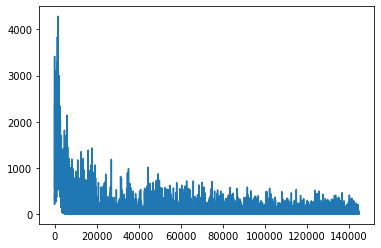

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(cost_list_episode, sigma=1)
plt.plot(np.arange(len(cost_list_episode)), ysmoothed)
plt.show()

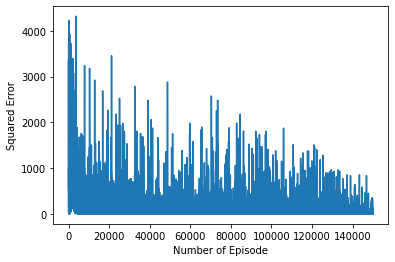

In [ ]:
t_episode = np.arange(len(cost_list_episode)) + 1
plt.plot(t_episode, cost_list_episode)
plt.xlabel("Number of Episode")
plt.ylabel("Squared Error")
plt.show()

In [ ]:


#probabilidades1=pd.DataFrame(proba)
#probabilidades2=pd.DataFrame(proba2)
proba22=ts2/tt2
proba2=pd.DataFrame(proba22)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


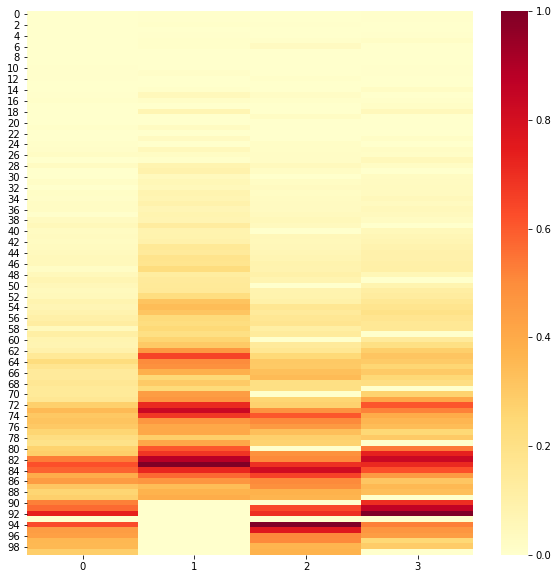

In [ ]:
plt.figure(figsize = (10,10))
#valores_q2=valores_q2/10
valores_q2[3]=[0,0,0,0]
valores_q2[13]=[0,0,0,0]
valores_q2[20]=[0,0,0,0]
valores_q2[22]=[0,0,0,0]
valores_q1[7]=[0,0,0,0]


mapa1= sns.heatmap(proba22,cmap="YlOrRd")

figure =mapa1.get_figure()
figure.savefig('mapa1.png',dpi=400)

In [ ]:
#ENTRENAMIENTO TERCERA SUB TAREA
# Each key represents a direction the agent is going. 
# "u" = moving up, "d" = down, "l" = left, "r" = right
# The output Q (4 x 1 Matrix) is defined as Q value for each action (totally 4 actions)
# Two dictionaries are used to map between indexes of Q and the action keys
key_to_index = {"u": 0, "d": 1, "l":2, "r":3}
index_to_key = {0:"u", 1:"d", 2:"l", 3:"r"}

# One-hot vector for each state. Each state represents one unique position in the grid
state_matrix = np.zeros((100,100))
for i in range(100):
    state_matrix[i, i] = 1

# Hyperarameters (fine tuned for this project)
learning_rate = 0.00001
num_episode = 5000
num_iter = 100
gamma = 0.9
e = 0.7
e_initial = e

# Network Parameters
n_hidden_1 = 256 
num_states = 100 
num_actions = 4

def createParameters():
    weights = {
        'h1': tf.Variable(tf.random_normal([n_hidden_1, num_states])),
        'out': tf.Variable(tf.random_normal([num_actions, n_hidden_1]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1,1])),
        'out': tf.Variable(tf.random_normal([num_actions,1]))
    }
    return weights, biases

def forwardProp(x, weights, biases):
    
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(weights['h1'], x), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(weights['out'], layer_1) + biases['out']
    return out_layer

# Construct model & Output
weights, biases = createParameters()
X_input = tf.placeholder(shape=[num_states, 1], dtype=tf.float32)
Q_next_state = tf.placeholder(shape=[num_actions, 1],dtype=tf.float32)
Qout = forwardProp(X_input, weights, biases)

# Find the index of the action which has the highest score in output matrix Q
first_action = tf.argmax(Qout,0)

# Define loss and optimizer
loss = (1/num_actions)*tf.reduce_sum(tf.square(Q_next_state - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
updateWeights = trainer.minimize(loss)

# Initialize the variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Record Cost
cost_list_iter = []
cost_list_episode = []

# ----------------- Start Training -----------------

# There are num_episode of games. Each time the agent state is reset to 0 (starting point)
tt3 = np.array([[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0] ])
ts3 = np.array([[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0], [0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0],[0, 0, 0,0] ])

ea=[]

for j in range(num_episode):
    agent = RLAgent(93)
    t_list=[]
    # Each game episode is iterated for num_iter times
    i=0
    vic=0
    for i in range(num_iter):

        
        posi=  agent.current_state
        
        if posi==3:
          break
        if posi==13:
          break  
        if posi==20:
          break
        if posi==22:
          break 
        if vic==1:
          break
        


        # Feedforward to the network, and output the action choices (the scores of all actions) and the first choice
        first_Q_idx, Q1 = sess.run([first_action, Qout],feed_dict={X_input:state_matrix[:,agent.current_state].reshape((100,1))})
        
        # Define the best action at the current state
        first_Q_idx = first_Q_idx[0]
        first_Q_key = index_to_key[first_Q_idx]
        
        # agent.getNextDirection() returns the allowed direction of step at the current state, such that it will not step outside of the 5 x 5 matrix map
        next_direction = agent.getNextDirection()
        
        # There is e chance that the agent will step in a random direction
        # The condition on the right is to ensure the best action "first_Q_key" is in the allowed choices
        if np.random.rand(1) < e or (first_Q_key not in next_direction):
            
            # Select randomly from the set of allowed directions
            rand_index = np.random.randint(0, len(next_direction))
            Q_index = key_to_index[next_direction[rand_index]]
        else:
            
            # Select the best action (with highest Q value)
            Q_index = first_Q_idx

        # Agent goes to the next state based on the selected action above


        if agent.current_state==7:
          vic=1
        if agent.current_state != 7:
        
          ea = (agent.current_state,Q_index)
          t_list.append(ea)


          agent.step(Q_index)
          


          tt3[ea]=tt3[ea]+1 
          # Get the reward at the current state. Reward < 0 when the path is undesirable, and vice versa
          coordinates = agent.getCoor()
          reward = agent.reward_map[coordinates[0], coordinates[1]]
          
          # Calculate the ouput Q-matrix for the next state
          Q2 = sess.run(Qout,feed_dict={X_input:state_matrix[:,agent.current_state].reshape((100,1))})
          
          # Subsitute the current Q value of the selected action with the best Q value of the next state, with discount of gamma <= 1
          Q_target = Q1
          Q_target[Q_index,0] = reward + gamma * np.max(Q2)
          
          # Update the weights by back propagation. 
          # Since the state has been incremented, we backpropagate the "previous_state" remembered by the agent object instead
          _,loss_val = sess.run([updateWeights,loss],feed_dict={X_input:state_matrix[:,agent.previous_state].reshape((100,1)),Q_next_state:Q_target})
          cost_list_iter.append(loss_val)
          
          # Print the progress if you want
          print("\r Iter/Episode = %d/%d" % (i, j), end = "")
          # print("Iter/Episode = %d/%d | state = %d | Loss = %f" % (i, j, agent.current_state, loss_val))
      



    largo=len(t_list)
    a=[]
    n=0
    if vic==1:
          print ("ganaste")
          for n in range(largo):
            a=t_list[n]
            #print (a)

            ts3[a]=ts3[a]+1
    # Record the cost
    if len(cost_list_iter) != 0:
        cost_list_episode.append(np.mean(cost_list_iter))
        cost_list_iter = []


 Iter/Episode = 50/0ganaste
 Iter/Episode = 52/1ganaste
 Iter/Episode = 26/24ganaste
 Iter/Episode = 18/29ganaste
 Iter/Episode = 46/34ganaste
 Iter/Episode = 68/36ganaste
 Iter/Episode = 36/40ganaste
 Iter/Episode = 40/46ganaste
 Iter/Episode = 46/48ganaste
 Iter/Episode = 22/50ganaste
 Iter/Episode = 62/59ganaste
 Iter/Episode = 52/61ganaste
 Iter/Episode = 40/66ganaste
 Iter/Episode = 62/68ganaste
 Iter/Episode = 72/69ganaste
 Iter/Episode = 48/73ganaste
 Iter/Episode = 90/74ganaste
 Iter/Episode = 34/78ganaste
 Iter/Episode = 62/80ganaste
 Iter/Episode = 72/83ganaste
 Iter/Episode = 82/85ganaste
 Iter/Episode = 66/87ganaste
 Iter/Episode = 34/94ganaste
 Iter/Episode = 44/99ganaste
 Iter/Episode = 46/105ganaste
 Iter/Episode = 46/110ganaste
 Iter/Episode = 94/130ganaste
 Iter/Episode = 50/138ganaste
 Iter/Episode = 62/141ganaste
 Iter/Episode = 84/143ganaste
 Iter/Episode = 30/145ganaste
 Iter/Episode = 92/151ganaste
 Iter/Episode = 44/160ganaste
 Iter/Episode = 90/164ganaste
 Iter/

In [ ]:
print("\nTesting phase starts")

# Reset the agent to the state of 0 (top-left corner)
agent = RLAgent(93)

# Record the action sequence
action_sequence = []

for i in range(50):
    print("Current state =", agent.current_state)
    # Forward propagate and get the output Q values
    Q_values = sess.run(Qout,feed_dict={X_input:state_matrix[:,agent.current_state].reshape((100,1))})
    if agent.current_state == 7:
        print("Goal arrived! Game ends.")
        break
        
    # Sort the values of Q, such that it contains the indexes of actions by a descending order of scores
    Q_sorted = np.flip(np.argsort(Q_values.squeeze()),axis = 0)
    
    # Get the allowed directions in the current state
    next_direction = agent.getNextDirection()
    
    # initalise the varible that will store the best action we take
    action_key = 99
    
    # We check each action in Q_sorted and see if it is in one of the allowed directions.
    # The action with higher Q-value will be checked first, once we know it is in the allowed directions, we select that action and exit the loop
    for j in Q_sorted:
        
        # Once an action is selected, exit the loop
        if action_key != 99:
            break
            
        # If the action is in the allowed direction, store it into action_key
        if index_to_key[j] in next_direction:
            action_key = index_to_key[j]
            
        # If not, then check the next action
        else:
            continue
            
    # Showing Q-matrix and how the agent select the action
#     print("Q_val = %s | Q_sorted = %s | Action_selected = %s | Allowed_direction  = %s" % (str(Q_values.squeeze()), str(Q_sorted), action_key, str(next_direction)))

    # Increment the state and record the action
    action_sequence.append(action_key)
    agent.step(action_key)
sess.close()

In [ ]:
plt.figure(figsize = (10,10))
mapa1= sns.heatmap(proba33,cmap="YlOrRd")
figure =mapa1.get_figure()
figure.savefig('mapa1.png',dpi=400)

NameError: ignored

[3, 3, 2, 0.0, 3, 3, 3, 0.0, 3, 2, 3, 3, 2, 0.0, 3, 3, 3, 3, 3, 2, 0.0, 1, 0.0, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2]


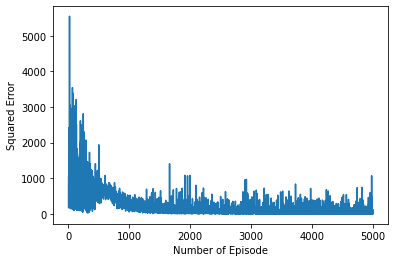

In [ ]:

t_episode = np.arange(len(cost_list_episode)) + 1
plt.plot(t_episode, cost_list_episode)
plt.xlabel("Number of Episode")
plt.ylabel("Squared Error")
plt.show()

In [ ]:
proba33=ts3/tt3
proba3=pd.DataFrame(proba33)
for j in range (100):
  for i in range(4):
    if np.isnan(proba33[j,i]):
      proba33[j,i]=0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
for j in range (100):
  for i in range(4):
    if np.isnan(proba11[j,i]):
      proba11[j,i]=0
i=0
j=0
for j in range (100):
  for i in range(4):
    if np.isnan(proba22[j,i]):
      proba22[j,i]=0
i=0
j=0

print (proba11[21,1],proba22[21,1],proba33[21,1])


In [ ]:
probatotal=proba11+proba22+proba33

print (probatotal [21,1])

0.9271042732990464


In [ ]:
p1 = [0,0]
p2 = [0,1]
p3 = [0,2]
p4 = [1,0]
p5 = [1,1]
p6 = [1,2]
p7 = [2,1]
print(probatotal[1,2])
for i in range (100):
        
        for j in range(4):

            posi=[i,j]
            
            


            if posi == p1 :
              probatotal[i,j]=probatotal[i,j]/3
            elif posi==p2:
              probatotal[i,j]=probatotal[i,j]/3
            elif posi==p3:
              probatotal[i,j]=probatotal[i,j]/3
            elif posi==p4:
              probatotal[i,j]=probatotal[i,j]/3
            elif posi==p5:
              probatotal[i,j]=probatotal[i,j]/3
            elif posi==p6:
              probatotal[i,j]=probatotal[i,j]/3
            elif posi==p7:
              probatotal[i,j]=probatotal[i,j]/3
            
            else:
              
              probatotal[i,j]=probatotal[i,j]/2
print (probatotal[2,1])

0.1007244901421833
0.031048233639447337


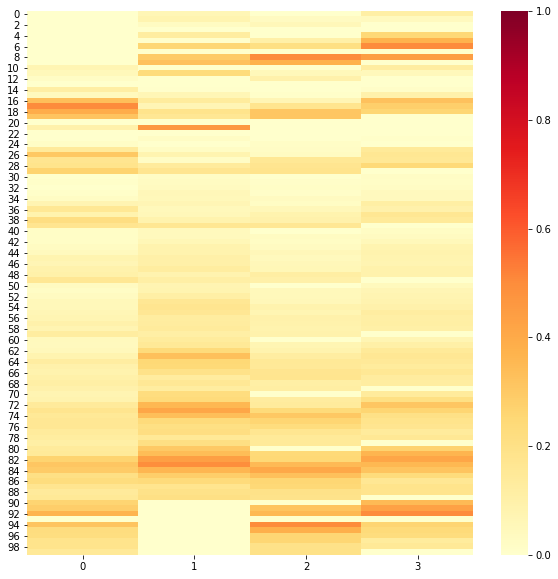

In [ ]:
plt.figure(figsize = (10,10))
#mapa1= sns.heatmap(probatotal,cmap="YlOrRd")
#, annot=True
ax=sns.heatmap(probatotal, vmin=0 , vmax=1, cmap='YlOrRd')  
plt.show()
figure =mapa1.get_figure()
figure.savefig('mapa1.png',dpi=400)

The steps that the agent has taken are recorded and ploted in the scatter graph beblow, which shows the starting point (star), available steps (yellow squares), obstacles (black squares), goal (red square) and the step trace taken by the agent (blue circles). 

It shows that the agent was successfully trained to escape the obstacles (black squares) and find the fastest route to the goal (red square).

In [ ]:
# Drawing the reward map and the wall
all_points = np.array([(x,y) for x in range(5) for y in range(5)])
punish_points = np.array([(0,1), (1,1), (2,1), (2,3), (3,3), (4,3)])
reward_points = np.array((4,4))
plt.scatter(all_points[:,1], 4-all_points[:,0], s=1000, marker = "s", c= "y")
plt.scatter(punish_points[:,1], 4-punish_points[:,0], s=1000, marker = "s", c= "k")
plt.scatter(reward_points[1], 4-reward_points[0], s=2000, marker = "s", c = "r")
plt.scatter(0, 4, s = 2000, marker = "*")

# Drawing the trajectory
test_agent = RLAgent(0)
coor_list = []
for key in action_sequence:
    test_agent.step(key)
    coor_list.append(test_agent.getCoor())
trajectory = np.array(coor_list)
plt.scatter(trajectory[:,1], 4-trajectory[:,0], s = 500, c = "b")


In [ ]:
# Plotting the cost along the episode

t_episode = np.arange(len(cost_list_episode)) + 1
plt.plot(t_episode, cost_list_episode)
plt.xlabel("Number of Episode")
plt.ylabel("Squared Error")
plt.show()

In [ ]:

t_episode = np.arange(len(reward_list)) + 1
plt.plot(t_episode, reward_list)
plt.xlabel("Number of Episode")
plt.ylabel("Reward")
plt.show()